# Project - Complex Networks
## Part 1
Ikram Ul Haq

In [1]:
from itertools import islice

import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Function in the following cell will load data from files and create a network using networkx

In [2]:
def create_network():
    """
    This function reads data from data folder and construct a network.

    """
    with open('data/actors.csv', 'r') as nodecsv:
        nodereader = csv.reader(nodecsv)
        nodes = [n for n in nodereader][1:]

    node_names = [n[0] for n in nodes]

    with open('data/actor_edges.csv', 'r') as edgecsv:
        edgereader = csv.reader(edgecsv)
        edges = [tuple(e) for e in edgereader][1:]

    G = nx.Graph()

    G.add_nodes_from(node_names)
    G.add_edges_from(edges)

    role_dict = {}
    number_of_movies_dict = {}
    birth_dict = {}
    awards_dict = {}
    nominee_dict = {}

    for node in nodes:  # Loop through the list, one row at a time
        role_dict[node[0]] = node[1]
        number_of_movies_dict[node[0]] = node[2]
        birth_dict[node[0]] = node[3]
        awards_dict[node[0]] = node[4]
        nominee_dict[node[0]] = node[5]

    nx.set_node_attributes(G, role_dict, 'role')
    nx.set_node_attributes(G, number_of_movies_dict, 'number_of_movies')
    nx.set_node_attributes(G, birth_dict, 'date_of_birth')
    nx.set_node_attributes(G, awards_dict, 'awards_won')
    nx.set_node_attributes(G, nominee_dict, 'awards_nominee')

    return G

### Creation of Network

In [3]:
graph = create_network()
print(graph)

Graph with 1790 nodes and 303886 edges


### Basic Properties

In [4]:
def calculate_basic_properties(G):
    """
    Function to calculate basic properties of network
    """

    return {
        'number_of_nodes': G.number_of_nodes(),
        'number_of_edges': G.number_of_edges(),
        'is_connected': nx.is_connected(G),
        'number_of_componentes': nx.number_connected_components(G),
        'average_degree': sum(dict(G.degree()).values()) / G.number_of_nodes(),
        'triadic_closure': nx.transitivity(G),
        'density': nx.density(G),
        'diameter': nx.diameter(G)
    }

In [5]:
calculate_basic_properties(graph)

{'number_of_nodes': 1790,
 'number_of_edges': 303886,
 'is_connected': True,
 'number_of_componentes': 1,
 'average_degree': 339.5374301675978,
 'triadic_closure': 0.44168268445910186,
 'density': 0.18979174408473884,
 'diameter': 4}

### Degree Centrality

In [6]:
d_c = nx.degree_centrality(graph)
d_c = dict(sorted(d_c.items(), key=lambda item: item[1], reverse=True))

for key, value in islice(d_c.items(), 5):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.6003353828954724
Bruce Davison: 0.5433202906651761
Martin Landau: 0.514812744550028
Robert Picardo: 0.5131358300726663
Mickey Rooney: 0.49972051425377306


### Closeness Centrality

In [7]:

c_c = nx.closeness_centrality(graph)
c_c = dict(sorted(c_c.items(), key=lambda item: item[1], reverse=True))

for key, value in islice(c_c.items(), 5):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.7138866719872307
Bruce Davison: 0.6859662576687117
Martin Landau: 0.6720510894064613
Robert Picardo: 0.6715465465465466
Mickey Rooney: 0.6657982880535913


### Betweenness Centrality

In [8]:
b_c = nx.betweenness_centrality(graph)

b_c = dict(sorted(b_c.items(), key=lambda item: item[1], reverse=True))

for key, value in islice(b_c.items(), 5):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.004638953847779323
Mark Hamill: 0.0033165644937928895
Dennis Hopper: 0.0030745413129134877
Bruce Davison: 0.002926650834219382
Alfred Molina: 0.0028854488975001004


### Eigenvector Centrality

In [9]:
e_v = nx.eigenvector_centrality(graph)
e_v = dict(sorted(e_v.items(), key=lambda item: item[1], reverse=True))

for key, value in islice(e_v.items(), 5):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.05827805635054685
Bruce Davison: 0.05412443489664284
Robert Picardo: 0.05164091723215189
Martin Landau: 0.05060727754485519
Victor Garber: 0.05055893592721768


### PageRank Centrality

In [10]:
pg_c = nx.pagerank(graph)
pg_c = dict(sorted(pg_c.items(), key=lambda item: item[1], reverse=True))

for key, value in islice(pg_c.items(), 5):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.0016068883041642523
Bruce Davison: 0.0014389545867463775
Martin Landau: 0.0013609462804783827
Robert Picardo: 0.0013598726881640464
Mickey Rooney: 0.0013284152392290507


In [11]:
for key, value in islice(pg_c.items(), 20):
    print(f"{key}: {value}")

Ed Begley Jr.: 0.0016068883041642523
Bruce Davison: 0.0014389545867463775
Martin Landau: 0.0013609462804783827
Robert Picardo: 0.0013598726881640464
Mickey Rooney: 0.0013284152392290507
James Earl Jones: 0.0013211853428963054
Mark Hamill: 0.001321035824361419
David Paymer: 0.0013126534665012853
Patrick Macnee: 0.0013018417875875032
Victor Garber: 0.0012935060086791655
Veronica Cartwright: 0.0012838249242998504
Carol Kane: 0.0012793882925565471
Piper Laurie: 0.0012790178075883598
Ricardo Montalban: 0.0012758858585499514
Jerry Goldsmith: 0.0012756176693136446
George Wendt: 0.0012671993068851732
Alfred Molina: 0.0012626223752037126
Leslie Nielsen: 0.0012548232580773088
Christopher Lloyd: 0.0012449531606845367
Ray Walston: 0.0012445529424922417


In [12]:
graph.degree('Ed Begley Jr.')


1074

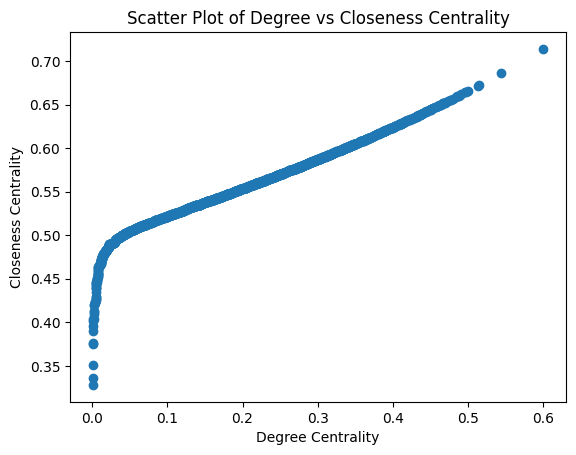

In [13]:
plt.scatter(list(d_c.values()), list(c_c.values()))

# Add labels and title
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Scatter Plot of Degree vs Closeness Centrality")

# Show the plot
plt.show()

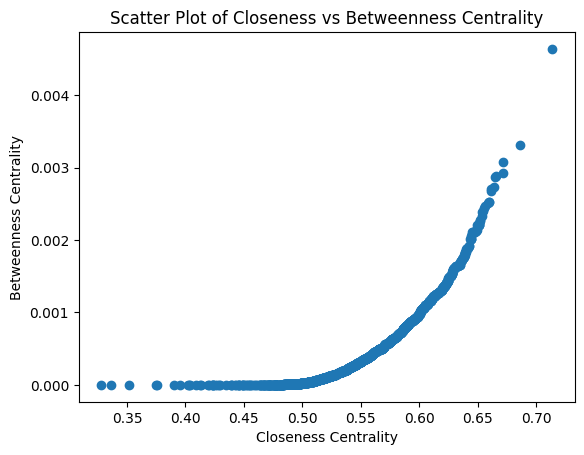

In [14]:
plt.scatter(list(c_c.values()), list(b_c.values()))

# Add labels and title
plt.xlabel("Closeness Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Scatter Plot of Closeness vs Betweenness Centrality")

# Show the plot
plt.show()

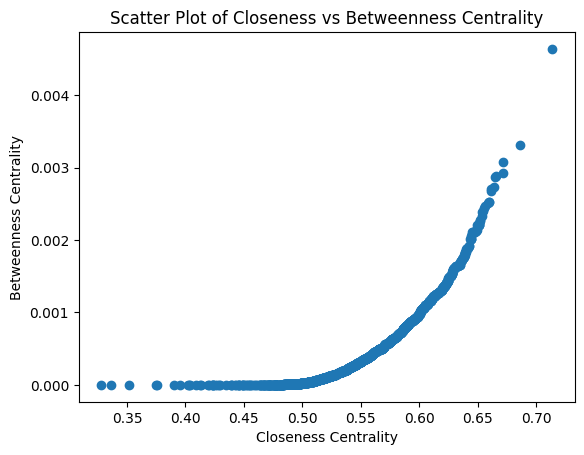

In [15]:
plt.scatter(list(c_c.values()), list(b_c.values()))

# Add labels and title
plt.xlabel("Closeness Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Scatter Plot of Closeness vs Betweenness Centrality")

# Show the plot
plt.show()

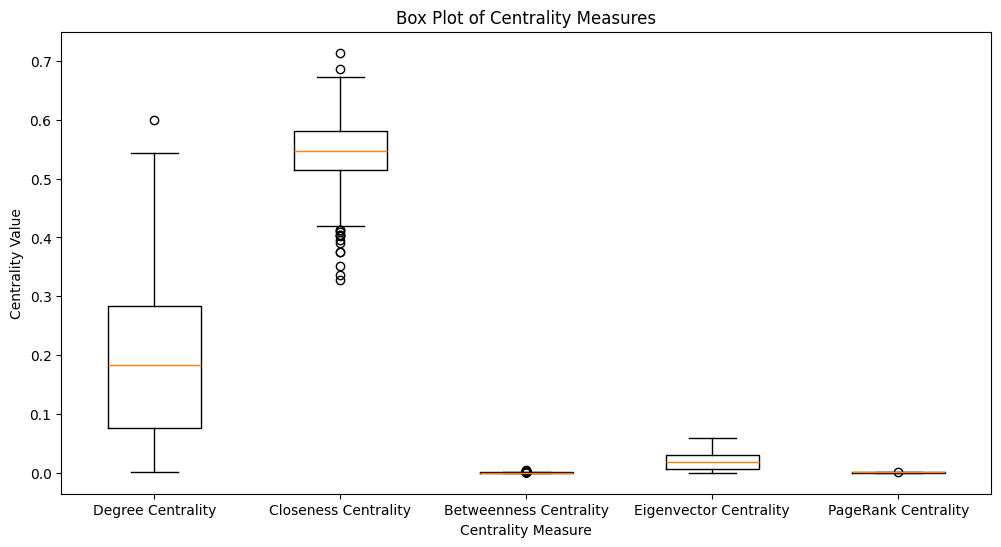

In [16]:
centrality_values = [list(d_c.values()), list(c_c.values()), list(b_c.values()), list(e_v.values()), list(pg_c.values())]

plt.figure(figsize=(12, 6))

# Create a box plot
plt.boxplot(centrality_values, labels=['Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality', 'PageRank Centrality'])

# Add labels and title
plt.xlabel("Centrality Measure")
plt.ylabel("Centrality Value")
plt.title("Box Plot of Centrality Measures")

# Show the plot
plt.show()

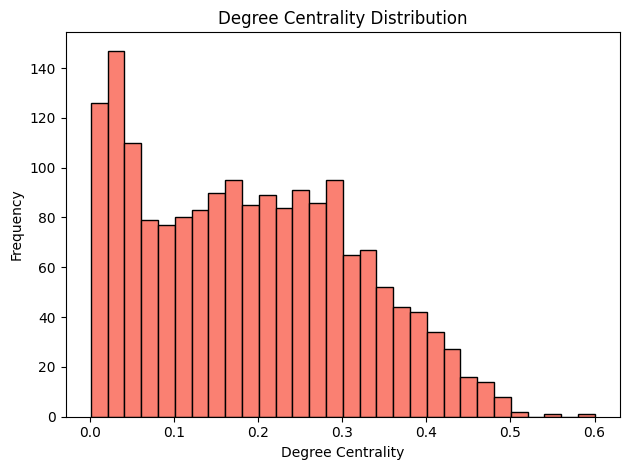

In [17]:
plt.hist(list(d_c.values()), bins=30, color='salmon', edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

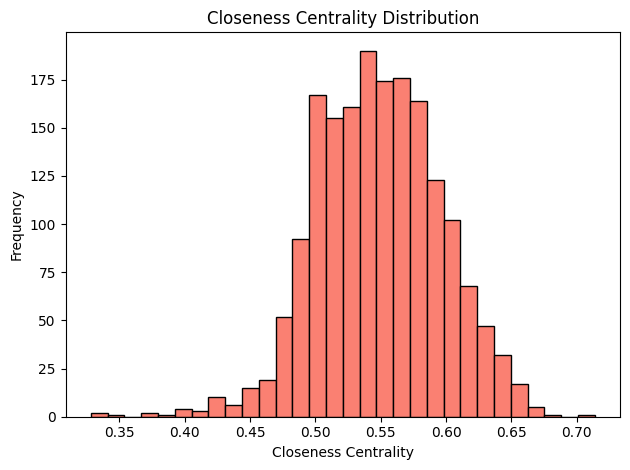

In [18]:
plt.hist(list(c_c.values()), bins=30, color='salmon', edgecolor='black')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

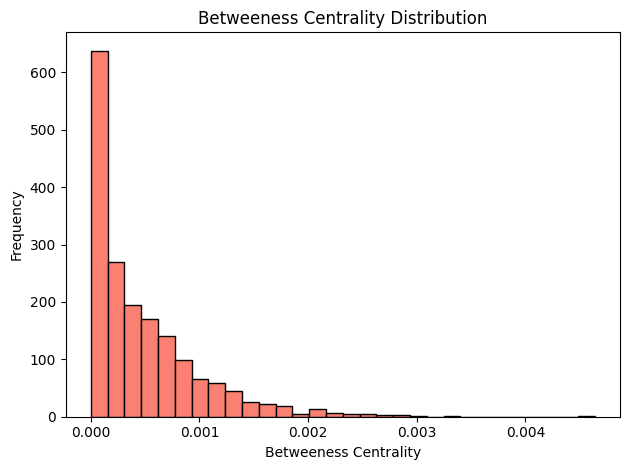

In [19]:
plt.hist(list(b_c.values()), bins=30, color='salmon', edgecolor='black')
plt.title('Betweeness Centrality Distribution')
plt.xlabel('Betweeness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

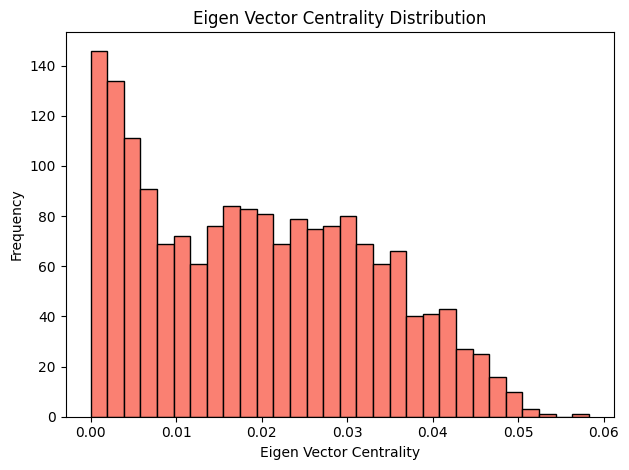

In [20]:
plt.hist(list(e_v.values()), bins=30, color='salmon', edgecolor='black')
plt.title('Eigen Vector Centrality Distribution')
plt.xlabel('Eigen Vector Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

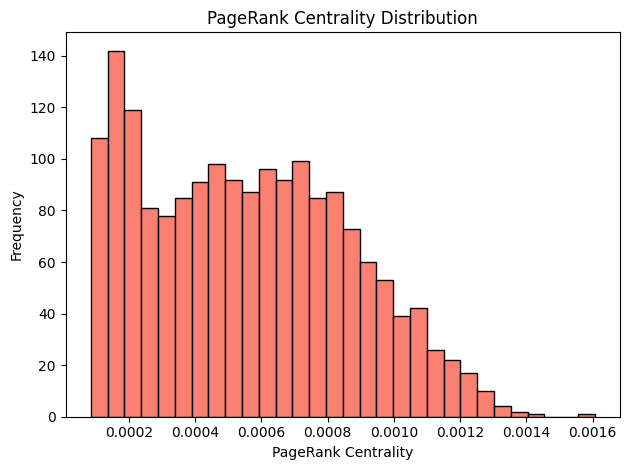

In [21]:
plt.hist(list(pg_c.values()), bins=30, color='salmon', edgecolor='black')
plt.title('PageRank Centrality Distribution')
plt.xlabel('PageRank Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

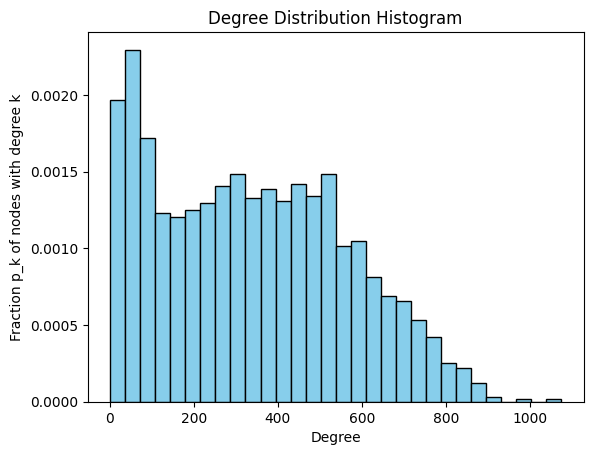

In [22]:
# Calculate degrees
degrees = [degree for node, degree in nx.degree(graph)]

total_nodes = len(degrees)

n, bins, patches = plt.hist(degrees, bins=30, density=True, color='skyblue', edgecolor='black')
normalized_bins = bins / total_nodes

plt.ylabel('Fraction p_k of nodes with degree k')
plt.xlabel('Degree')

plt.title('Degree Distribution Histogram')

plt.show()

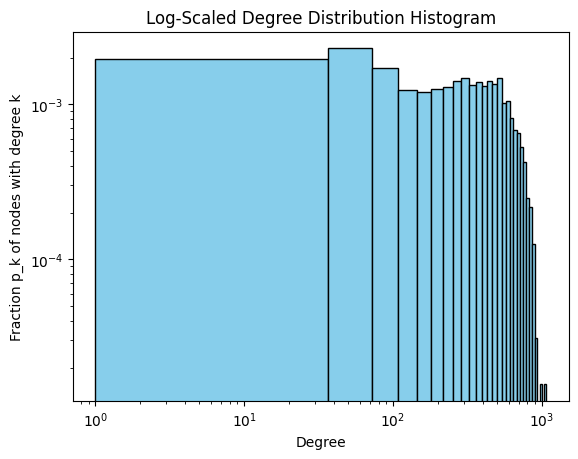

In [23]:
n, bins, patches = plt.hist(degrees, bins=30, density=True, color='skyblue', edgecolor='black')
normalized_bins = bins / total_nodes

plt.ylabel('Fraction p_k of nodes with degree k')
plt.xlabel('Degree')
plt.title('Log-Scaled Degree Distribution Histogram')

plt.yscale('log')
plt.xscale('log')

plt.show()

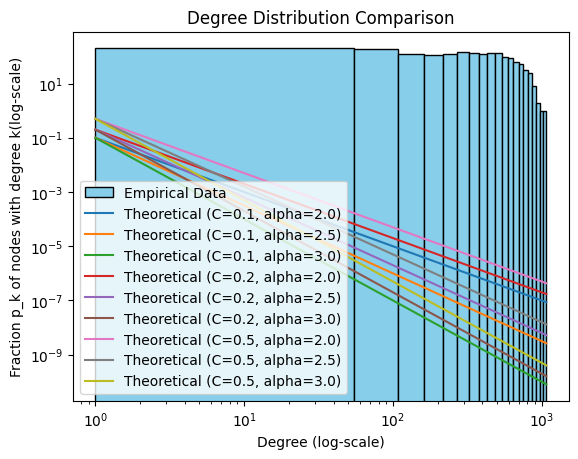

In [24]:
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black', label='Empirical Data', log=True)

# Define different values of C and alpha for the theoretical power-law distribution
C_values = [0.1, 0.2, 0.5]
alpha_values = [2.0, 2.5, 3.0]

# Overlay the theoretical distributions for different C and alpha
x = np.arange(1, max(degrees) + 1)
for C in C_values:
    for alpha in alpha_values:
        y = C * np.power(x, -alpha)
        plt.plot(x, y, label=f'Theoretical (C={C}, alpha={alpha})')

plt.title('Degree Distribution Comparison')
plt.xlabel('Degree (log-scale)')
plt.ylabel('Fraction p_k of nodes with degree k(log-scale)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [25]:
def calculate_alpha(degree_sequence):
    k_min = min(degree_sequence)
    sum_terms = sum(np.log(k / (k_min - 0.5)) for k in degree_sequence)
    n = len(degree_sequence)
    alpha = 1 + n / sum_terms
    return alpha

In [26]:
alpha = calculate_alpha(degrees)


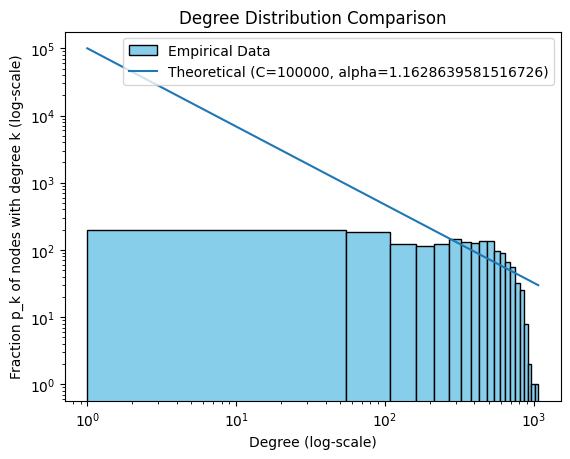

In [27]:
plt.hist(degrees, bins=20, color='skyblue', edgecolor='black', label='Empirical Data', log=True)

C = 100000

# Overlay the theoretical distributions for different C and alpha
x = np.arange(1, max(degrees) + 1)
y = C * np.power(x, -alpha)
plt.plot(x, y, label=f'Theoretical (C={C}, alpha={alpha})')

plt.title('Degree Distribution Comparison')
plt.xlabel('Degree (log-scale)')
plt.ylabel('Fraction p_k of nodes with degree k (log-scale)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

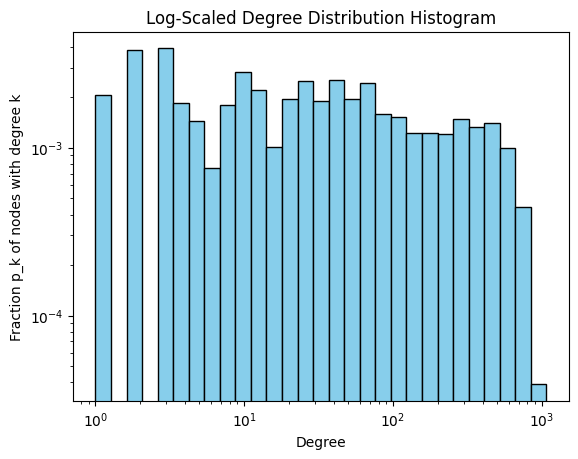

In [28]:
num_bins = 30
log_bin_edges = np.logspace(np.log10(min(degrees)), np.log10(max(degrees) + 1), num_bins)

# Plot the degree distribution using logarithmic binning
n, bins, patches = plt.hist(degrees, bins=log_bin_edges, density=True, color='skyblue', edgecolor='black')
normalized_bins = bins / total_nodes

plt.ylabel('Fraction p_k of nodes with degree k')
plt.xlabel('Degree')
plt.title('Log-Scaled Degree Distribution Histogram')

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

plt.show()

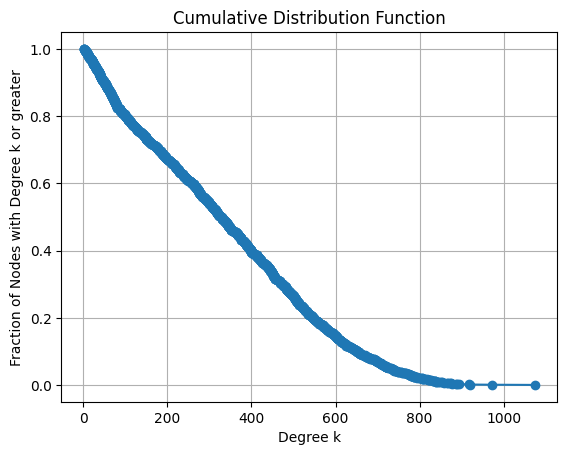

In [29]:
# Sort the degrees in ascending order
sorted_degrees = sorted(degrees)

# Calculate the CDF
total_nodes = len(sorted_degrees)
cdf = [1 - i / total_nodes for i in range(total_nodes)]

# Plot the CDF
plt.plot(sorted_degrees, cdf, marker='o', linestyle='-')
plt.title('Cumulative Distribution Function')
plt.xlabel('Degree k')
plt.ylabel('Fraction of Nodes with Degree k or greater')
plt.grid()
plt.show()

In [30]:
important_nodes = [node for node, centrality_value in pg_c.items() if centrality_value > 0.0012]
len(important_nodes)

35

In [31]:
subgraph = graph.subgraph(important_nodes)

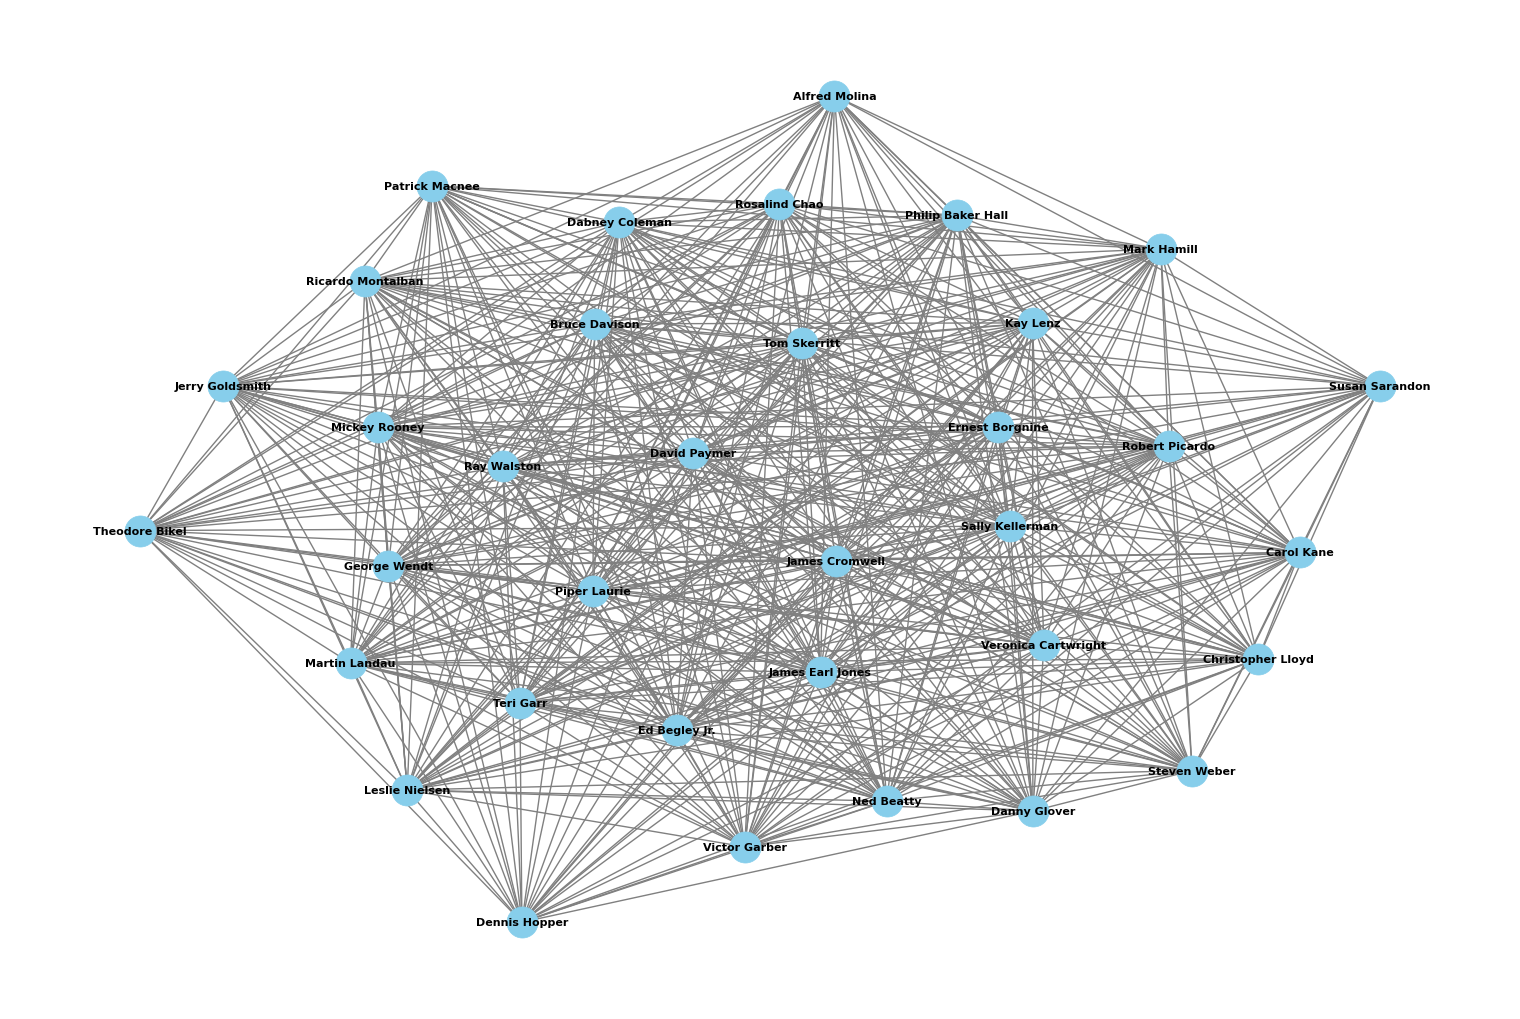

In [32]:
pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
plt.figure(figsize=(15,10))
nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.show()

In [33]:
# Find the diameter of the graph
diameter = nx.diameter(graph)

print("Diameter of the graph:", diameter)

# If you also want to get the nodes along the diameter
if diameter > 0:
    diameter_path = nx.diameter(graph, e=None)
    print("Nodes along the diameter:", diameter_path)

Diameter of the graph: 4
Nodes along the diameter: 4


In [35]:
# Calculate the clustering coefficients for all nodes
clustering_coefficients = nx.clustering(graph)

# Calculate the mean clustering coefficient
mean_clustering_coefficient = nx.average_clustering(graph)

print(f"Clustering coefficients for each node: {clustering_coefficients}")
print(f"Mean clustering coefficient: {mean_clustering_coefficient}")

Clustering coefficients for each node: {'Fred Astaire': 0.6077530069715774, 'Lauren Bacall': 0.4252250395107538, 'Brigitte Bardot': 0.27149321266968324, 'John Belushi': 0.7330216535433071, 'Ingmar Bergman': 0.420403739330714, 'Ingrid Bergman': 0.3989945538332635, 'Humphrey Bogart': 0.3925679492812755, 'Marlon Brando': 0.4146118721461187, 'Richard Burton': 0.41489734106509596, 'James Cagney': 0.4454413005137643, 'Gary Cooper': 0.39777970011534025, 'Bette Davis': 0.4290667642812112, 'Doris Day': 0.4443573667711599, 'Olivia de Havilland': 0.4934550743374273, 'James Dean': 0.6349352106927865, 'Georges Delerue': 0.5837465564738292, 'Marlene Dietrich': 0.35578977353653324, 'Kirk Douglas': 0.44071541732677394, 'Federico Fellini': 0.391025641025641, 'Henry Fonda': 0.4408161625898703, 'Joan Fontaine': 0.4763996495111603, 'Clark Gable': 0.29987129987129985, 'Judy Garland': 0.5191387559808612, 'John Gielgud': 0.34401944597321593, 'Jerry Goldsmith': 0.35230471424586435, 'Cary Grant': 0.42855222476

In [36]:
print("Diameter of the graph:", diameter)

# Find one of the diameters using the eccentricity of nodes
diameter_nodes = [node for node, eccentricity in nx.eccentricity(graph).items() if eccentricity == diameter]

# Print the names of nodes along the diameter
if diameter_nodes:
    print("Nodes along the diameter:")
    for node in diameter_nodes:
        print("Node", node)

Diameter of the graph: 4
Nodes along the diameter:
Node Federico Fellini
Node Henry Mancini
Node Pamela Anderson
Node Rowan Atkinson
Node Sandra Bullock
Node John Carpenter
Node George Lucas
Node David Lynch
Node Steve Martin
Node Charlize Theron
Node Pedro AlmodÃ³var
Node Jean-Jacques Annaud
Node David Arquette
Node Brian Blessed
Node Jackie Chan
Node Roger Corman
Node GÃ©rard Depardieu
Node Fran Drescher
Node Joe Eszterhas
Node David Fincher
Node Vivica A. Fox
Node Serena Grandi
Node Nina Hartley
Node Lance Henriksen
Node Jim Jarmusch
Node Ron Jeremy
Node Jean-Pierre Jeunet
Node Sylvia Kristel
Node Brandon Lee
Node Michael Madsen
Node Peter North
Node Sam Raimi
Node Burt Reynolds
Node Ving Rhames
Node Jerry Seinfeld
Node William Shatner
Node Anna Nicole Smith
Node Tami Stronach
Node Jim Abrahams
Node Percy Adlon
Node Mario Adorf
Node Michelangelo Antonioni
Node Gregg Araki
Node Denys Arcand
Node Roger Avary
Node Burt Bacharach
Node Javier Bardem
Node Justine Bateman
Node Noah Baumbac

In [37]:
robert_alpacino_path = nx.shortest_path(graph, source="Fred Astaire", target="Mukul Anand")
robert_alpacino_path

['Fred Astaire', 'Alan Ladd', 'Amitabh Bachchan', 'Mukul Anand']

In [39]:
important_nodes = [node for node, centrality_value in d_c.items() if centrality_value > 0.212 and centrality_value < 0.216]
len(important_nodes)

16

In [40]:
subgraph = graph.subgraph(important_nodes)

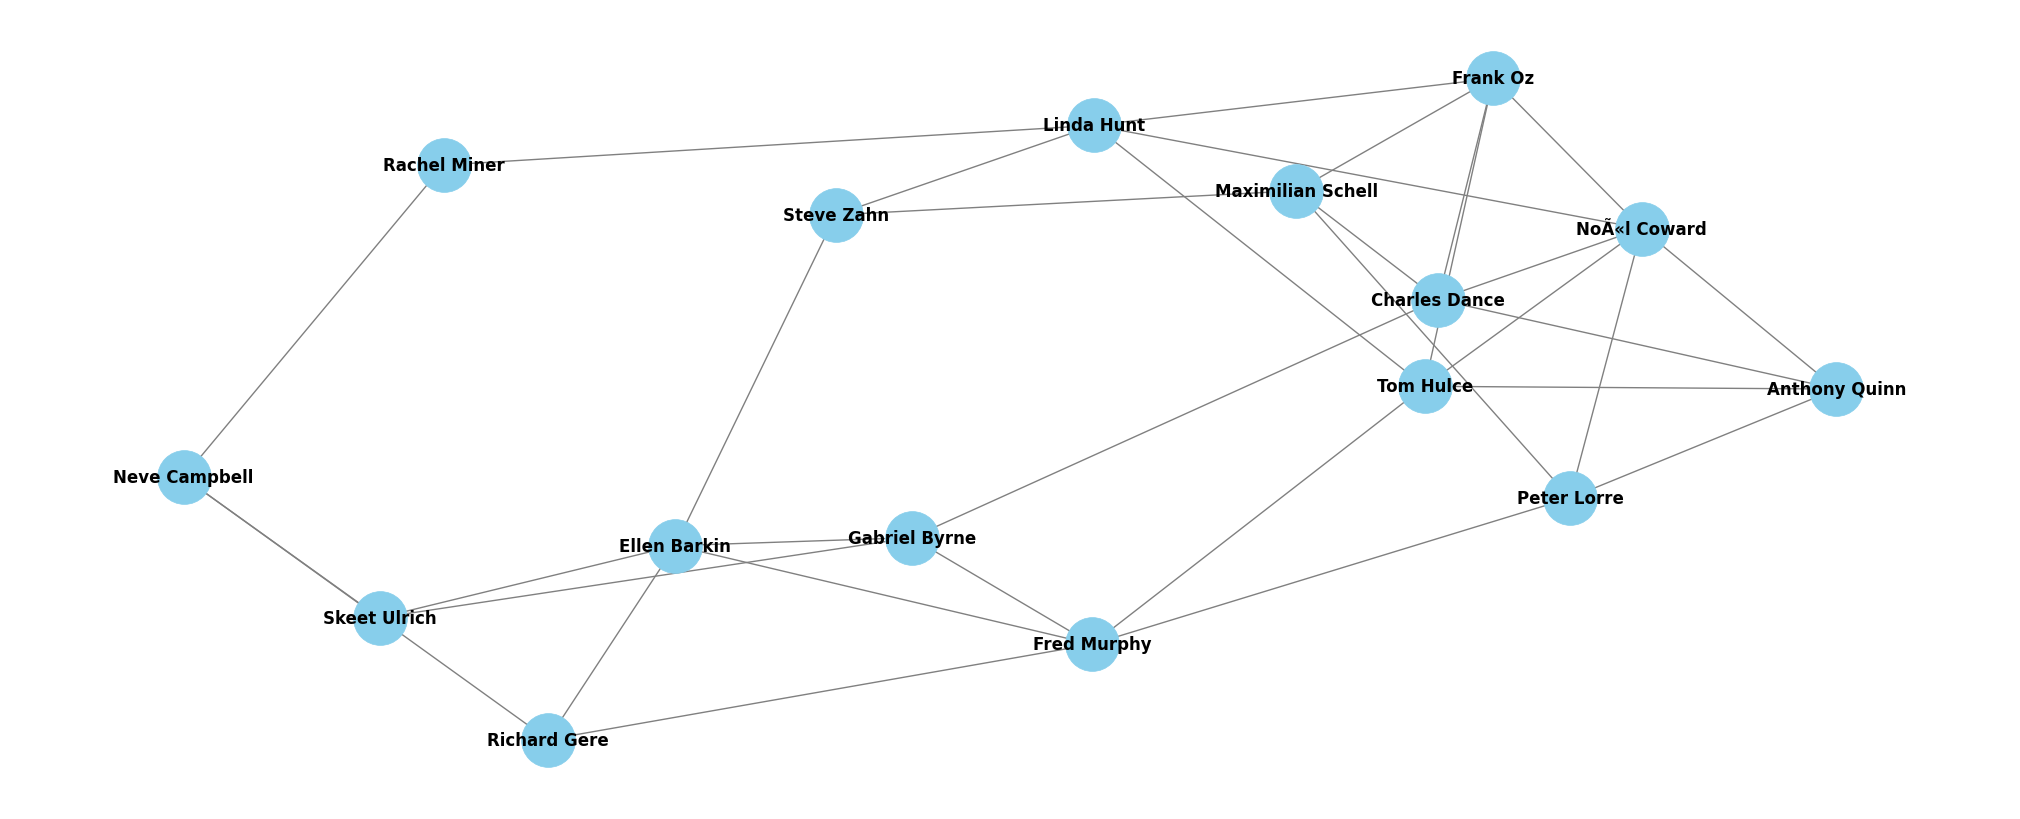

In [41]:
pos = nx.spring_layout(subgraph)  # You can use different layout algorithms
plt.figure(figsize=(20,8))
nx.draw(subgraph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.show()

In [42]:
closeness_centrality = nx.closeness_centrality(subgraph)

# Find the node with the highest closeness centrality
highest_closeness_node = max(closeness_centrality, key=closeness_centrality.get)

print(f"The node with the highest closeness centrality is: {highest_closeness_node}")
print(f"Closeness centrality value: {closeness_centrality[highest_closeness_node]}")

The node with the highest closeness centrality is: Fred Murphy
Closeness centrality value: 0.5769230769230769


In [43]:
# Calculate PageRank centrality
pagerank_centrality = nx.pagerank(subgraph)

# Find the node with the highest PageRank centrality
highest_pagerank_node = max(pagerank_centrality, key=pagerank_centrality.get)

print(f"The node with the highest PageRank centrality is: {highest_pagerank_node}")
print(f"PageRank centrality value: {pagerank_centrality[highest_pagerank_node]}")

The node with the highest PageRank centrality is: NoÃ«l Coward
PageRank centrality value: 0.08288448332979081


In [44]:
shortest_path_distance = nx.shortest_path_length(subgraph, source="Fred Murphy", target="Neve Campbell")
print(shortest_path_distance)

2


In [45]:
shortest_path_distance = nx.shortest_path_length(subgraph, source="NoÃ«l Coward", target="Neve Campbell")
print(shortest_path_distance)

3


In [46]:
# source_node = "Fred Murphy"
source_node = "NoÃ«l Coward"

# Calculate the shortest paths from the source node to all other nodes
shortest_paths = nx.shortest_path_length(subgraph, source=source_node)

# Print the shortest distances
print(f"Shortest distances from Node {source_node} to all other nodes:")
for node, distance in shortest_paths.items():
    print(f"To Node {node}: {distance}")


Shortest distances from Node NoÃ«l Coward to all other nodes:
To Node NoÃ«l Coward: 0
To Node Peter Lorre: 1
To Node Anthony Quinn: 1
To Node Frank Oz: 1
To Node Charles Dance: 1
To Node Tom Hulce: 1
To Node Linda Hunt: 1
To Node Maximilian Schell: 2
To Node Fred Murphy: 2
To Node Gabriel Byrne: 2
To Node Rachel Miner: 2
To Node Steve Zahn: 2
To Node Richard Gere: 3
To Node Ellen Barkin: 3
To Node Skeet Ulrich: 3
To Node Neve Campbell: 3
